In [1]:
from json import loads

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def matches(row, q):
    if isinstance(q, dict):
        return isinstance(row, dict) and all(key in row and matches(row[key], q[key]) for key in q.keys())
    elif isinstance(q, float):
        return isinstance(row, float) and abs(q - row) < 1e-6
    else:
        return row == q

def query(db="db", q={}):
    res = []
    with open(f"{db}.txt", "r") as fd:
        for i, line in enumerate(fd):
            data = loads(line)
            if matches(data, q):
                res.append({**data, "_id": i})
    return res

def query_first(q):
    with open("db.txt", "r") as fd:
        for i, line in enumerate(fd):
            data = loads(line)
            if matches(data, q):
                return {**data, "_id": i}
    return None

In [45]:
ODES = ["L-ODE1", "L-ODE2", "L-ODE3", "L-ODE4", "L-ODE5", "L-ODEn1", "L-ODEn2", "L-ODEn3", "NL-ODE1", "NL-ODE2", "NL-ODE3", "NL-ODE4", "NL-ODEn1", "NL-ODEn2", "SODE1", "SODE2", "SODE3", "PDE1", "PDE2", "PDE3", "PDE4", "PDE5", "PDE6", "PDE7", "PDE8", "PDE9", "PDE10"]
ODES_ = [ode for ode in ODES if ode != "SODE3"]

In [39]:
def make_plot(experiments, param_name, params, func, exclude_sode3=False, odes=ODES, row_labels=None):
    odess = [ode for ode in odes if ode != "SODE3"] if exclude_sode3 else ODES
    n = len(odess) // 2
    for odes in [odess[:n], odess[n:]]:
        data = np.log10(np.array([
            [
                (lambda x,y:1e10 if len(x) == 0 else func(x, y))(
                    [
                        x["losses"][-1]
                        for x in experiments
                        if x["kwargs"]["ode"] == ode and x["kwargs"][param_name] == param],
                    [
                        x["errors"][-1]
                        for x in experiments
                        if x["kwargs"]["ode"] == ode and x["kwargs"][param_name] == param]
                )
                for ode in odes
            ] for param in params]))
        plt.figure(figsize=(27, 3.1))
        im = plt.imshow(data, vmin=-7, vmax=4, cmap="GnBu")

        plt.xticks(np.arange(len(odes)), odes, fontsize="large")
        if row_labels is None:
            row_labels = params
        plt.yticks(np.arange(len(params)), row_labels, fontsize="xx-large")

        for i in range(len(params)):
            for j in range(len(odes)):
                plt.text(j, i, f"{data[i, j]:.1f}", ha="center", va="center", color="k", fontsize="xx-large")
        plt.show()

def make_plots(db, params, param_name, row_labels=None, odes=ODES):
    experiments = [x["payload"] for x in query(db)]
    make_plot(experiments, param_name, params, lambda l,e:np.mean(l), odes, row_labels=row_labels)
    make_plot(experiments, param_name, params, lambda l,e:np.mean(e), exclude_sode3=True, odes=odes, row_labels=row_labels)
#     make_table(experiments, param_name, params)

1 2

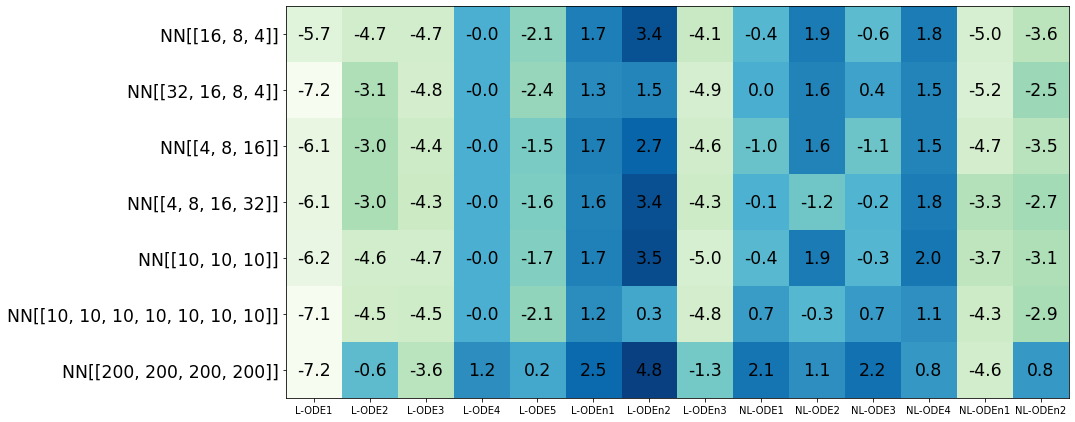

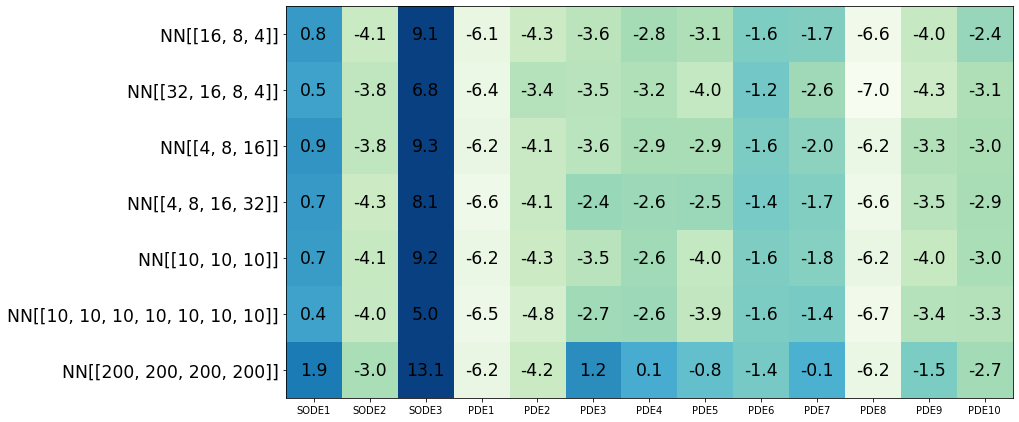

In [116]:
odess = ODES
n = len(odess) // 2 + 1
datas_e = np.array([
    [-5.66e+00, -7.19e+00, -6.14e+00, -6.11e+00, -6.18e+00, -7.09e+00, -7.17e+00],
    [-4.70e+00, -3.13e+00, -3.03e+00, -3.02e+00, -4.60e+00, -4.54e+00, -6.26e-01],
    [-4.72e+00, -4.75e+00, -4.42e+00, -4.26e+00, -4.71e+00, -4.50e+00, -3.57e+00],
    [-2.12e-02, -2.19e-02, -2.12e-02, -2.11e-02, -2.12e-02, -2.17e-02, 1.20e+00],
    [-2.07e+00, -2.37e+00, -1.49e+00, -1.59e+00, -1.72e+00, -2.15e+00, 2.22e-01],
    [1.74e+00, 1.33e+00, 1.68e+00, 1.57e+00, 1.66e+00, 1.24e+00, 2.50e+00],
    [3.38e+00, 1.47e+00, 2.67e+00, 3.42e+00, 3.54e+00, 2.75e-01, 4.81e+00],
    [-4.10e+00, -4.92e+00, -4.57e+00, -4.33e+00, -5.00e+00, -4.75e+00, -1.29e+00],
    [-3.57e-01, 2.83e-02, -9.73e-01, -8.66e-02, -4.27e-01, 6.75e-01, 2.10e+00],
    [1.86e+00, 1.56e+00, 1.56e+00, -1.17e+00, 1.86e+00, -3.43e-01, 1.13e+00],
    [-5.67e-01, 4.37e-01, -1.06e+00, -2.19e-01, -3.11e-01, 7.02e-01, 2.20e+00],
    [1.81e+00, 1.54e+00, 1.51e+00, 1.81e+00, 1.99e+00, 1.11e+00, 8.43e-01],
    [-4.96e+00, -5.21e+00, -4.74e+00, -3.32e+00, -3.70e+00, -4.31e+00, -4.64e+00],
    [-3.63e+00, -2.51e+00, -3.53e+00, -2.71e+00, -3.10e+00, -2.89e+00, 7.93e-01],
    [7.59e-01, 4.73e-01, 9.36e-01, 7.46e-01, 6.81e-01, 4.48e-01, 1.87e+00],
    [-4.13e+00, -3.79e+00, -3.77e+00, -4.29e+00, -4.07e+00, -4.03e+00, -2.99e+00],
    [9.11e+00, 6.75e+00, 9.30e+00, 8.07e+00, 9.21e+00, 4.98e+00, 1.31e+01],
    [-6.14e+00, -6.38e+00, -6.21e+00, -6.56e+00, -6.23e+00, -6.45e+00, -6.19e+00],
    [-4.26e+00, -3.38e+00, -4.09e+00, -4.12e+00, -4.28e+00, -4.81e+00, -4.15e+00],
    [-3.62e+00, -3.51e+00, -3.60e+00, -2.42e+00, -3.54e+00, -2.70e+00, 1.21e+00],
    [-2.80e+00, -3.20e+00, -2.94e+00, -2.57e+00, -2.65e+00, -2.56e+00, 9.38e-02],
    [-3.12e+00, -3.95e+00, -2.93e+00, -2.48e+00, -3.96e+00, -3.85e+00, -7.80e-01],
    [-1.61e+00, -1.25e+00, -1.57e+00, -1.40e+00, -1.63e+00, -1.56e+00, -1.37e+00],
    [-1.68e+00, -2.59e+00, -2.04e+00, -1.73e+00, -1.83e+00, -1.43e+00, -7.71e-02],
    [-6.59e+00, -6.97e+00, -6.24e+00, -6.56e+00, -6.22e+00, -6.65e+00, -6.25e+00],
    [-4.03e+00, -4.33e+00, -3.30e+00, -3.52e+00, -4.04e+00, -3.42e+00, -1.51e+00],
    [-2.40e+00, -3.11e+00, -3.01e+00, -2.89e+00, -2.97e+00, -3.31e+00, -2.71e+00]
]).T
d1 = datas_e[:,:n]
d2 = datas_e[:,n:]
for odes, data in zip([odess[:n], odess[n:]], [d1, d2]):
    plt.figure(figsize=(27, 7.2))
    im = plt.imshow(data, vmin=-7, vmax=4, cmap="GnBu")

    ys = ["NN[[16, 8, 4]]", "NN[[32, 16, 8, 4]]", "NN[[4, 8, 16]]", "NN[[4, 8, 16, 32]]", "NN[[10, 10, 10]]", "NN[[10, 10, 10, 10, 10, 10, 10]]", "NN[[200, 200, 200, 200]]"]
    plt.xticks(np.arange(len(odes)), odes, fontsize="medium")
    plt.yticks(np.arange(len(ys)), ys, fontsize="xx-large")

    for i in range(len(ys)):
        for j in range(len(odes)):
            plt.text(j, i, f"{data[i, j]:.1f}", ha="center", va="center", color="k", fontsize="xx-large")
    plt.show()

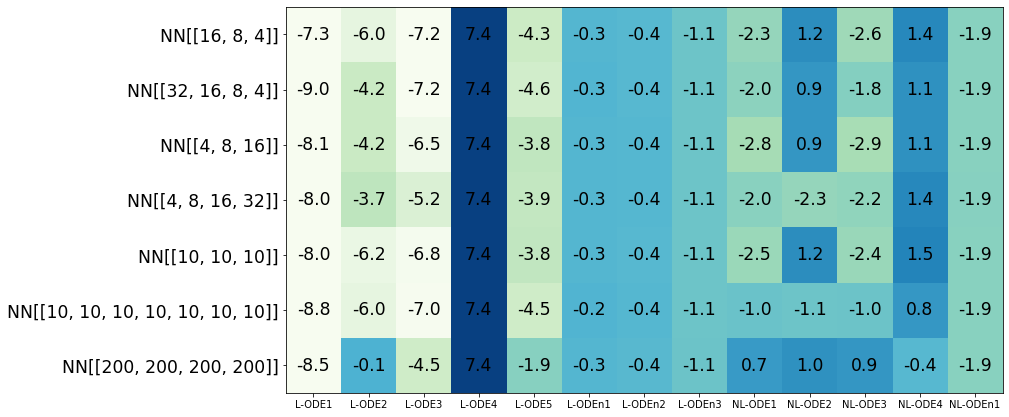

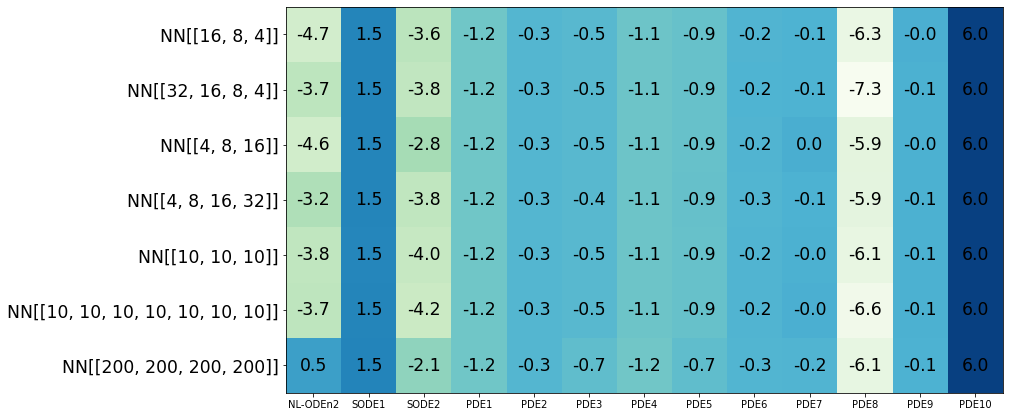

In [117]:
odess = ODES_
n = len(odess) // 2
datas_l = np.array([
    [-7.28e+00, -9.02e+00, -8.08e+00, -7.97e+00, -7.96e+00, -8.76e+00, -8.53e+00],
    [-5.97e+00, -4.18e+00, -4.18e+00, -3.70e+00, -6.23e+00, -5.99e+00, -1.03e-01],
    [-7.17e+00, -7.15e+00, -6.55e+00, -5.22e+00, -6.85e+00, -6.95e+00, -4.48e+00],
    [7.37e+00, 7.37e+00, 7.37e+00, 7.37e+00, 7.37e+00, 7.37e+00, 7.37e+00],
    [-4.29e+00, -4.61e+00, -3.79e+00, -3.92e+00, -3.84e+00, -4.50e+00, -1.88e+00],
    [-3.27e-01, -2.70e-01, -3.25e-01, -3.19e-01, -3.25e-01, -2.29e-01, -3.30e-01],
    [-4.02e-01, -3.85e-01, -3.70e-01, -3.78e-01, -4.01e-01, -3.55e-01, -4.39e-01],
    [-1.09e+00, -1.09e+00, -1.09e+00, -1.09e+00, -1.09e+00, -1.09e+00, -1.07e+00],
    [-2.29e+00, -2.02e+00, -2.83e+00, -1.97e+00, -2.48e+00, -1.00e+00, 6.93e-01],
    [1.17e+00, 8.72e-01, 8.72e-01, -2.29e+00, 1.17e+00, -1.11e+00, 1.04e+00],
    [-2.58e+00, -1.80e+00, -2.90e+00, -2.18e+00, -2.44e+00, -1.03e+00, 9.02e-01],
    [1.35e+00, 1.07e+00, 1.05e+00, 1.35e+00, 1.52e+00, 8.50e-01, -3.89e-01],
    [-1.89e+00, -1.89e+00, -1.89e+00, -1.88e+00, -1.89e+00, -1.89e+00, -1.89e+00],
    [-4.69e+00, -3.66e+00, -4.63e+00, -3.17e+00, -3.79e+00, -3.71e+00, 5.42e-01],
    [1.47e+00, 1.47e+00, 1.49e+00, 1.47e+00, 1.46e+00, 1.47e+00, 1.54e+00],
    [-3.62e+00, -3.83e+00, -2.79e+00, -3.81e+00, -4.03e+00, -4.25e+00, -2.14e+00],
    [-1.18e+00, -1.18e+00, -1.18e+00, -1.19e+00, -1.19e+00, -1.19e+00, -1.19e+00],
    [-3.18e-01, -3.18e-01, -3.18e-01, -3.18e-01, -3.18e-01, -3.18e-01, -3.18e-01],
    [-4.51e-01, -4.51e-01, -4.50e-01, -4.49e-01, -4.51e-01, -4.53e-01, -6.89e-01],
    [-1.10e+00, -1.11e+00, -1.10e+00, -1.10e+00, -1.10e+00, -1.10e+00, -1.20e+00],
    [-8.99e-01, -8.99e-01, -9.00e-01, -8.89e-01, -9.01e-01, -9.00e-01, -7.17e-01],
    [-2.21e-01, -2.07e-01, -2.33e-01, -2.62e-01, -2.24e-01, -2.31e-01, -2.65e-01],
    [-1.40e-01, -1.42e-01, 2.74e-02, -1.03e-01, -4.50e-02, -7.26e-03, -2.15e-01],
    [-6.26e+00, -7.27e+00, -5.87e+00, -5.92e+00, -6.13e+00, -6.63e+00, -6.06e+00],
    [-3.87e-02, -6.06e-02, -4.52e-02, -7.17e-02, -6.23e-02, -7.97e-02, -1.19e-01],
    [6.01e+00, 6.01e+00, 6.01e+00, 6.01e+00, 6.01e+00, 6.01e+00, 6.01e+00]
]).T
d1 = datas_l[:,:n]
d2 = datas_l[:,n:]
for odes, data in zip([odess[:n], odess[n:]], [d1, d2]):
    plt.figure(figsize=(27, 7.1))
    im = plt.imshow(data, vmin=-7, vmax=4, cmap="GnBu")

    ys = ["NN[[16, 8, 4]]", "NN[[32, 16, 8, 4]]", "NN[[4, 8, 16]]", "NN[[4, 8, 16, 32]]", "NN[[10, 10, 10]]", "NN[[10, 10, 10, 10, 10, 10, 10]]", "NN[[200, 200, 200, 200]]"]
    plt.xticks(np.arange(len(odes)), odes, fontsize="medium")
    plt.yticks(np.arange(len(ys)), ys, fontsize="xx-large")

    for i in range(len(ys)):
        for j in range(len(odes)):
            plt.text(j, i, f"{data[i, j]:.1f}", ha="center", va="center", color="k", fontsize="xx-large")
    plt.show()

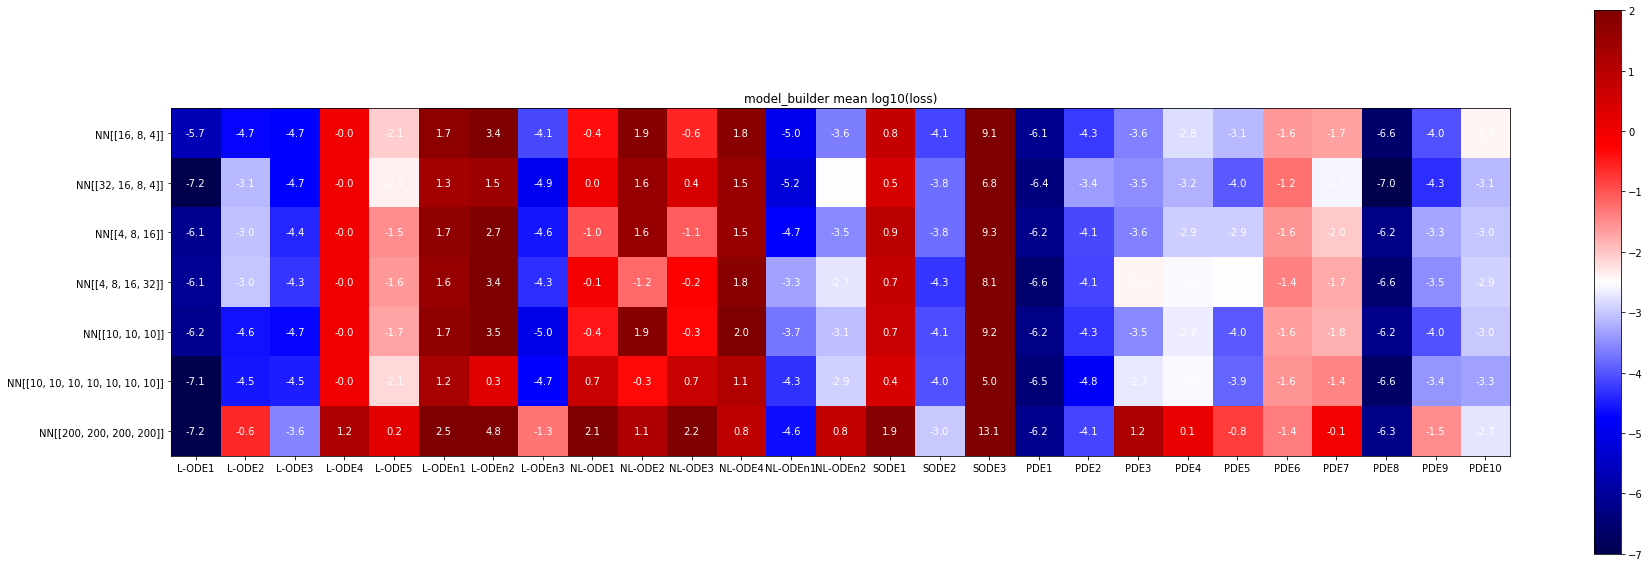

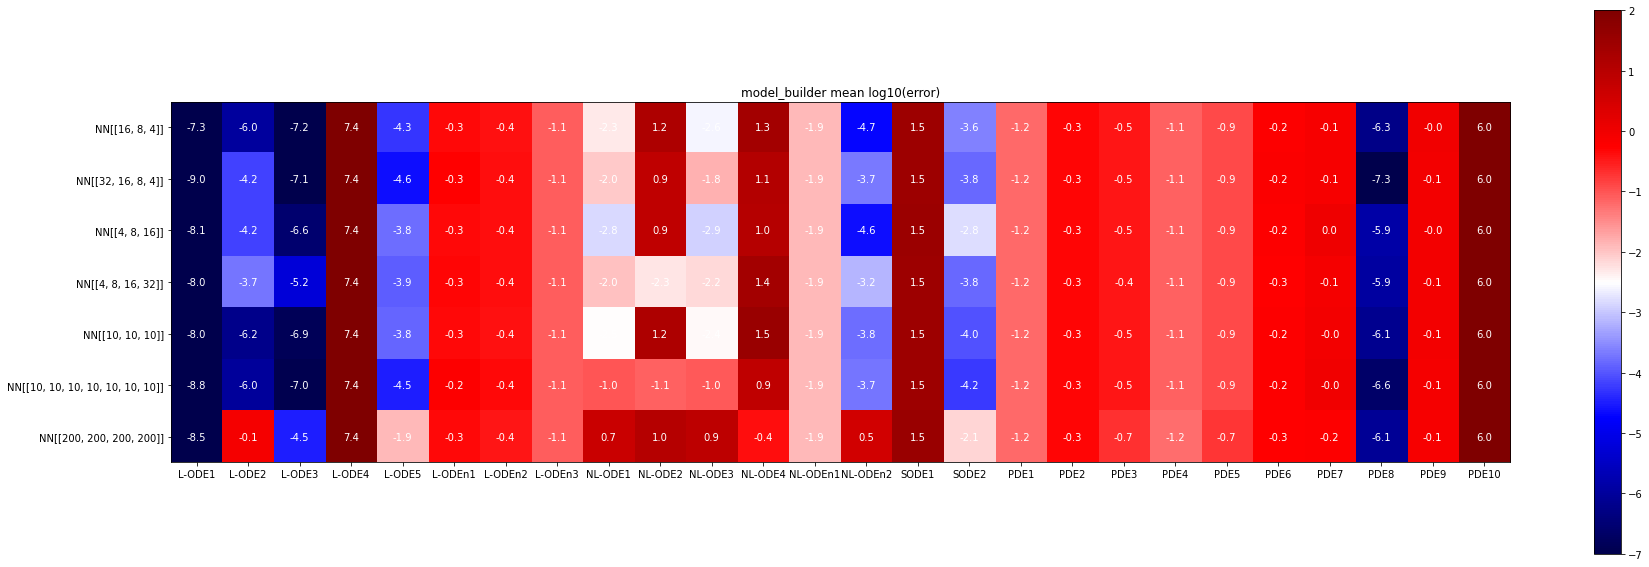

ode       NN[[16, 8, 4]]        NN[[32, 16, 8, 4]]    NN[[4, 8, 16]]        NN[[4, 8, 16, 32]]    NN[[10, 10, 10]]      NN[[10, 10, 10, 10, 10, 10, 10]]    NN[[200, 200, 200, 200]]
--------  --------------------  --------------------  --------------------  --------------------  --------------------  ----------------------------------  --------------------------
L-ODE1    -5.66e+00, -7.28e+00  -7.19e+00, -9.02e+00  -6.14e+00, -8.08e+00  -6.11e+00, -7.97e+00  -6.18e+00, -7.96e+00  -7.09e+00, -8.76e+00                -7.17e+00, -8.53e+00
L-ODE2    -4.70e+00, -5.97e+00  -3.13e+00, -4.18e+00  -3.03e+00, -4.18e+00  -3.02e+00, -3.70e+00  -4.60e+00, -6.23e+00  -4.54e+00, -5.99e+00                -6.26e-01, -1.03e-01
L-ODE3    -4.72e+00, -7.17e+00  -4.75e+00, -7.15e+00  -4.42e+00, -6.55e+00  -4.26e+00, -5.22e+00  -4.71e+00, -6.85e+00  -4.50e+00, -6.95e+00                -3.57e+00, -4.48e+00
L-ODE4    -2.12e-02, 7.37e+00   -2.19e-02, 7.37e+00   -2.12e-02, 7.37e+00   -2.11e-02, 7.37e+00   -2.12e-

<ipython-input-22-ec1524abec4c>:45: RuntimeWarning: invalid value encountered in log10
  np.log10(np.mean([x["errors"][-1] for x in res[ode][str(param)]]))


In [23]:
make_plots(
    db="db1",
    params=["NN[[16, 8, 4]]", "NN[[32, 16, 8, 4]]", "NN[[4, 8, 16]]", "NN[[4, 8, 16, 32]]", "NN[[10, 10, 10]]", "NN[[10, 10, 10, 10, 10, 10, 10]]", "NN[[200, 200, 200, 200]]"],
    param_name="model_builder"
)

3 4

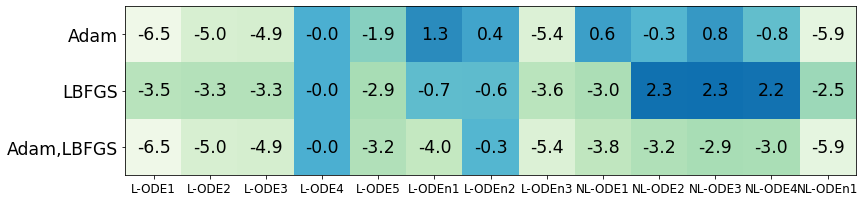

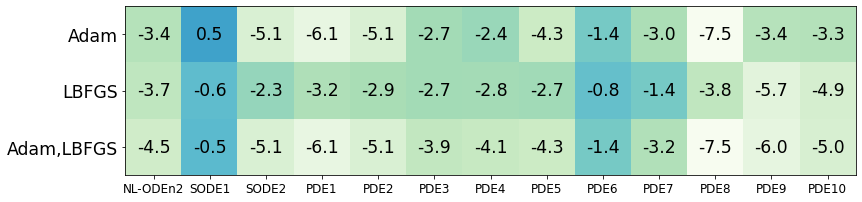

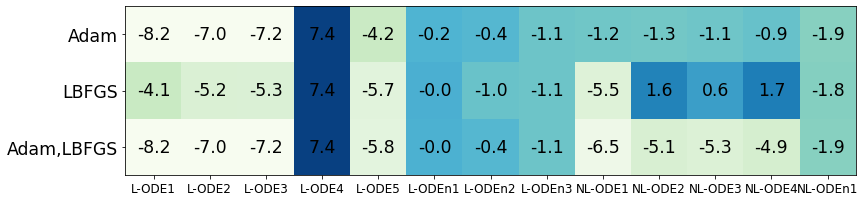

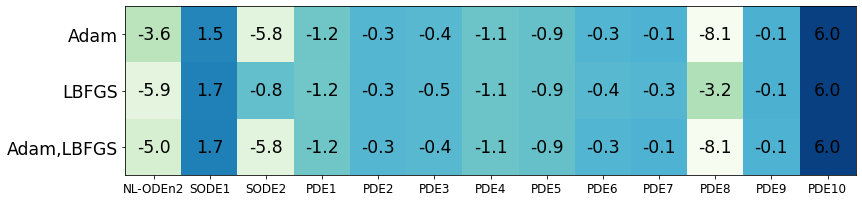

In [40]:
make_plots(
    db="db2",
    params=[[1,0],[0,1],[1,1]],
    param_name="optimizers",
    row_labels=["Adam", "LBFGS", "Adam,LBFGS"]
)

5 6

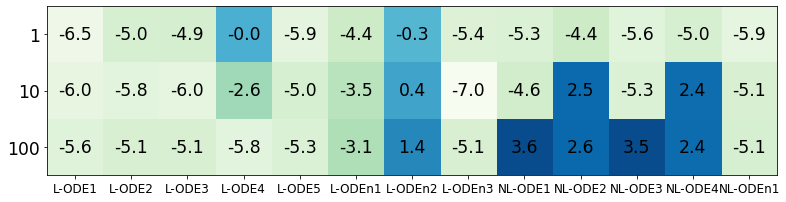

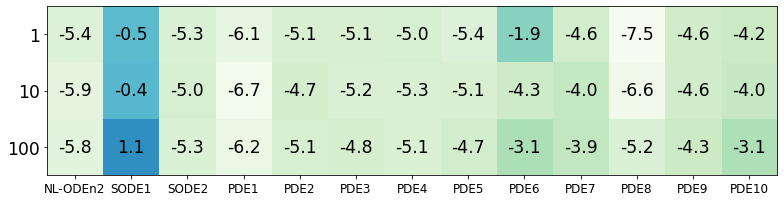

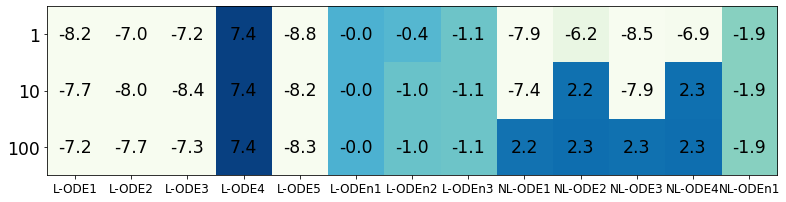

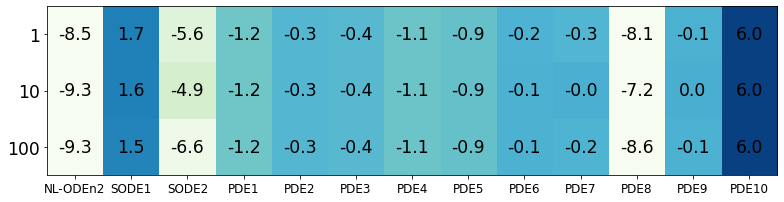

In [41]:
make_plots(
    db="db3",
    params=[1, 10, 100],
    param_name="border_loss_multiplier"
)

7

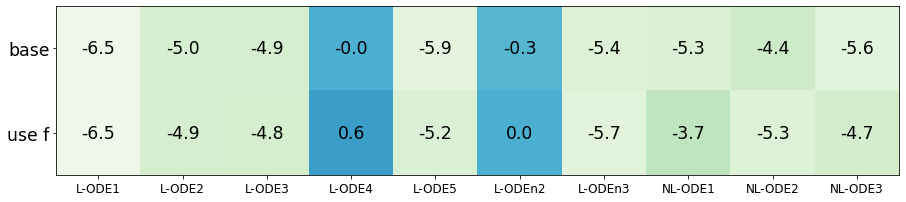

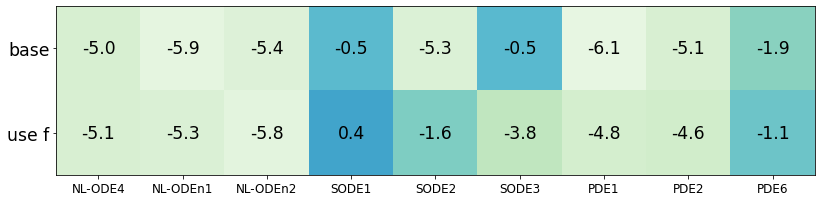

In [84]:
experiments1 = [x["payload"] for x in query("db3") if x["payload"]["kwargs"]["border_loss_multiplier"] == 1]
experiments4 = [x["payload"] for x in query("db4")]
odess = ["L-ODE1", "L-ODE2", "L-ODE3", "L-ODE4", "L-ODE5", "L-ODEn2", "L-ODEn3", "NL-ODE1", "NL-ODE2", "NL-ODE3", "NL-ODE4", "NL-ODEn1", "NL-ODEn2", "SODE1", "SODE2", "SODE3", "PDE1", "PDE2", "PDE6"]
n = len(odess) // 2 + 1
for odes in [odess[:n], odess[n:]]:
    data = np.log10(np.array([[
            np.mean([x["losses"][-1] for x in experiments1 if x["kwargs"]["ode"] == ode]) for ode in odes
        ], [
            np.mean([x["losses"][-1] for x in experiments4 if x["kwargs"]["ode"] == ode]) for ode in odes
        ]]))
    plt.figure(figsize=(27, 3.1))
    im = plt.imshow(data, vmin=-7, vmax=4, cmap="GnBu")

    plt.xticks(np.arange(len(odes)), odes, fontsize="large")
    plt.yticks(np.arange(2), ["base", "use f"], fontsize="xx-large")

    for i in range(2):
        for j in range(len(odes)):
            plt.text(j, i, f"{data[i, j]:.1f}", ha="center", va="center", color="k", fontsize="xx-large")
    plt.show()

8

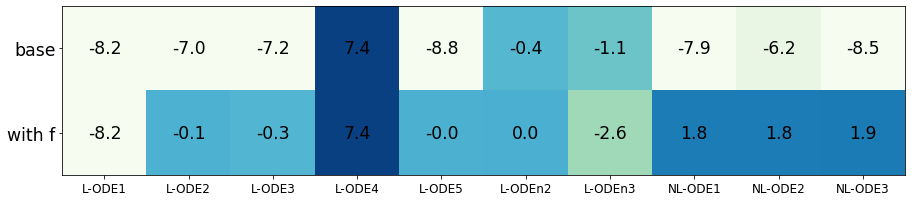

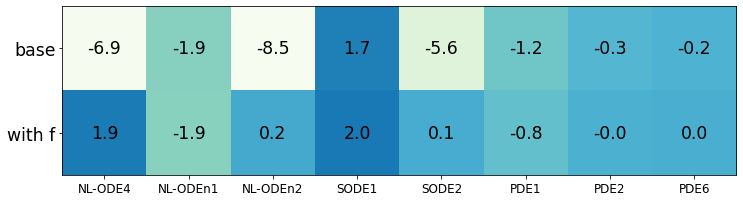

In [83]:
experiments1 = [x["payload"] for x in query("db3") if x["payload"]["kwargs"]["border_loss_multiplier"] == 1]
experiments4 = [x["payload"] for x in query("db4")]
odess = ["L-ODE1", "L-ODE2", "L-ODE3", "L-ODE4", "L-ODE5", "L-ODEn2", "L-ODEn3", "NL-ODE1", "NL-ODE2", "NL-ODE3", "NL-ODE4", "NL-ODEn1", "NL-ODEn2", "SODE1", "SODE2", "PDE1", "PDE2", "PDE6"]
n = len(odess) // 2 + 1
for odes in [odess[:n], odess[n:]]:
    data = np.log10(np.array([[
            np.mean([x["errors"][-1] for x in experiments1 if x["kwargs"]["ode"] == ode]) for ode in odes
        ], [
            np.mean([x["errors"][-1] for x in experiments4 if x["kwargs"]["ode"] == ode]) for ode in odes
        ]]))
    plt.figure(figsize=(27, 3.1))
    im = plt.imshow(data, vmin=-7, vmax=4, cmap="GnBu")

    plt.xticks(np.arange(len(odes)), odes, fontsize="large")
    plt.yticks(np.arange(2), ["base", "use f"], fontsize="xx-large")

    for i in range(2):
        for j in range(len(odes)):
            plt.text(j, i, f"{data[i, j]:.1f}", ha="center", va="center", color="k", fontsize="xx-large")
    plt.show()

9

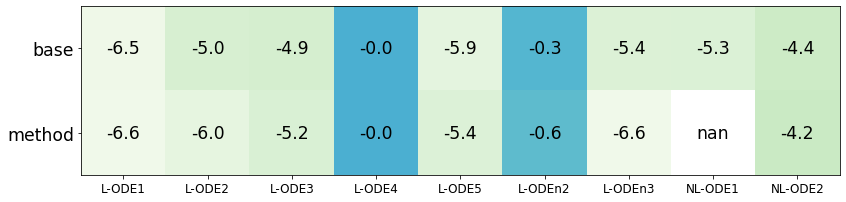

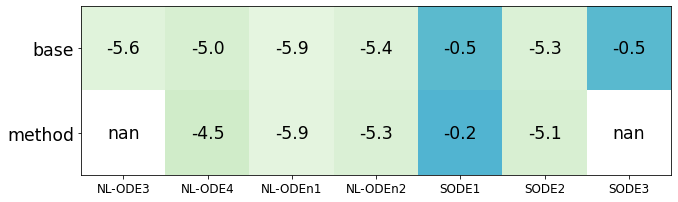

In [78]:
experiments1 = [x["payload"] for x in query("db3") if x["payload"]["kwargs"]["border_loss_multiplier"] == 1]
experiments4 = [x["payload"] for x in query("db5")]
odess = ["L-ODE1", "L-ODE2", "L-ODE3", "L-ODE4", "L-ODE5", "L-ODEn2", "L-ODEn3", "NL-ODE1", "NL-ODE2", "NL-ODE3", "NL-ODE4", "NL-ODEn1", "NL-ODEn2", "SODE1", "SODE2", "SODE3"]
n = len(odess) // 2 + 1
for odes in [odess[:n], odess[n:]]:
    data = np.log10(np.array([[
            np.mean([x["losses"][-1] for x in experiments1 if x["kwargs"]["ode"] == ode]) for ode in odes
        ], [
            np.mean([x["losses"][-1] for x in experiments4 if x["kwargs"]["ode"] == ode]) for ode in odes
        ]]))
    plt.figure(figsize=(27, 3.1))
    im = plt.imshow(data, vmin=-7, vmax=4, cmap="GnBu")

    plt.xticks(np.arange(len(odes)), odes, fontsize="large")
    plt.yticks(np.arange(2), ["base", "method"], fontsize="xx-large")

    for i in range(2):
        for j in range(len(odes)):
            plt.text(j, i, f"{data[i, j]:.1f}", ha="center", va="center", color="k", fontsize="xx-large")
    plt.show()

10

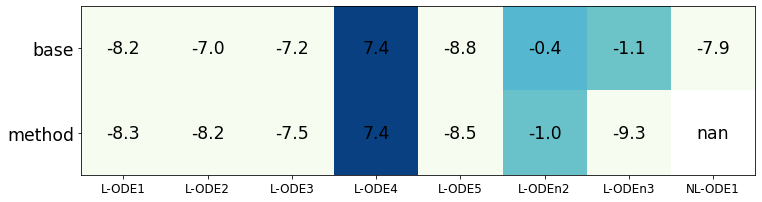

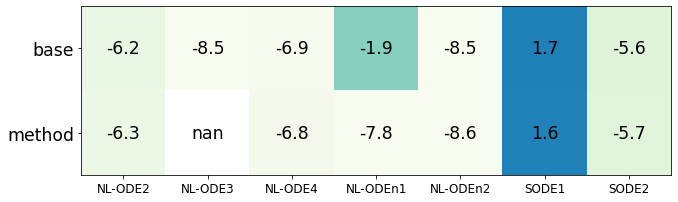

In [79]:
experiments1 = [x["payload"] for x in query("db3") if x["payload"]["kwargs"]["border_loss_multiplier"] == 1]
experiments4 = [x["payload"] for x in query("db5")]
odess = ["L-ODE1", "L-ODE2", "L-ODE3", "L-ODE4", "L-ODE5", "L-ODEn2", "L-ODEn3", "NL-ODE1", "NL-ODE2", "NL-ODE3", "NL-ODE4", "NL-ODEn1", "NL-ODEn2", "SODE1", "SODE2"]
n = len(odess) // 2 + 1
for odes in [odess[:n], odess[n:]]:
    data = np.log10(np.array([[
            np.mean([x["errors"][-1] for x in experiments1 if x["kwargs"]["ode"] == ode]) for ode in odes
        ], [
            np.mean([x["errors"][-1] for x in experiments4 if x["kwargs"]["ode"] == ode]) for ode in odes
        ]]))
    plt.figure(figsize=(27, 3.1))
    im = plt.imshow(data, vmin=-7, vmax=4, cmap="GnBu")

    plt.xticks(np.arange(len(odes)), odes, fontsize="large")
    plt.yticks(np.arange(2), ["base", "method"], fontsize="xx-large")

    for i in range(2):
        for j in range(len(odes)):
            plt.text(j, i, f"{data[i, j]:.1f}", ha="center", va="center", color="k", fontsize="xx-large")
    plt.show()

11

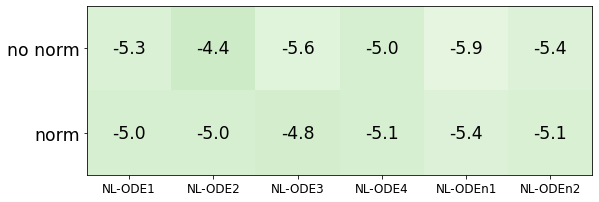

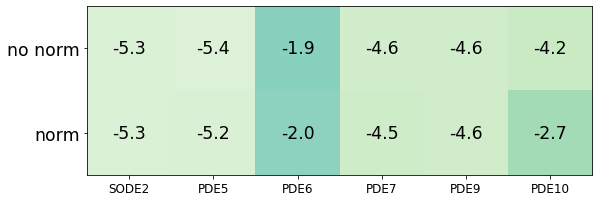

In [76]:
experiments1 = [x["payload"] for x in query("db3") if x["payload"]["kwargs"]["border_loss_multiplier"] == 1]
experiments4 = [x["payload"] for x in query("db7")]
odess = ["NL-ODE1", "NL-ODE2", "NL-ODE3", "NL-ODE4", "NL-ODEn1", "NL-ODEn2", "SODE2", "PDE5", "PDE6", "PDE7", "PDE9", "PDE10"]
n = len(odess) // 2
for odes in [odess[:n], odess[n:]]:
    data = np.log10(np.array([[
            np.mean([x["losses"][-1] for x in experiments1 if x["kwargs"]["ode"] == ode]) for ode in odes
        ], [
            np.mean([np.power(10, -4.5) if np.isnan(x["losses"][-1]) else x["losses"][-1] for x in experiments4 if x["kwargs"]["ode"] == ode]) for ode in odes
        ]]))
    plt.figure(figsize=(27, 3.1))
    im = plt.imshow(data, vmin=-7, vmax=4, cmap="GnBu")

    plt.xticks(np.arange(len(odes)), odes, fontsize="large")
    plt.yticks(np.arange(2), ["base", "norm"], fontsize="xx-large")

    for i in range(2):
        for j in range(len(odes)):
            plt.text(j, i, f"{data[i, j]:.1f}", ha="center", va="center", color="k", fontsize="xx-large")
    plt.show()

12

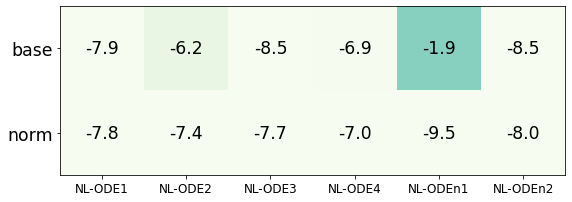

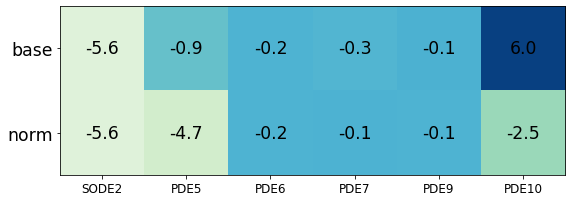

In [80]:
experiments1 = [x["payload"] for x in query("db3") if x["payload"]["kwargs"]["border_loss_multiplier"] == 1]
experiments4 = [x["payload"] for x in query("db7")]
odess = ["NL-ODE1", "NL-ODE2", "NL-ODE3", "NL-ODE4", "NL-ODEn1", "NL-ODEn2", "SODE2", "PDE5", "PDE6", "PDE7", "PDE9", "PDE10"]
n = len(odess) // 2
for odes in [odess[:n], odess[n:]]:
    data = np.log10(np.array([[
            np.mean([x["errors"][-1] for x in experiments1 if x["kwargs"]["ode"] == ode]) for ode in odes
        ], [
            np.mean([np.exp(-0.2) if np.isnan(x["errors"][-1]) else x["errors"][-1] for x in experiments4 if x["kwargs"]["ode"] == ode]) for ode in odes
        ]]))
    plt.figure(figsize=(27, 3.1))
    im = plt.imshow(data, vmin=-7, vmax=4, cmap="GnBu")

    plt.xticks(np.arange(len(odes)), odes, fontsize="large")
    plt.yticks(np.arange(2), ["base", "norm"], fontsize="xx-large")

    for i in range(2):
        for j in range(len(odes)):
            plt.text(j, i, f"{data[i, j]:.1f}", ha="center", va="center", color="k", fontsize="xx-large")
    plt.show()

13

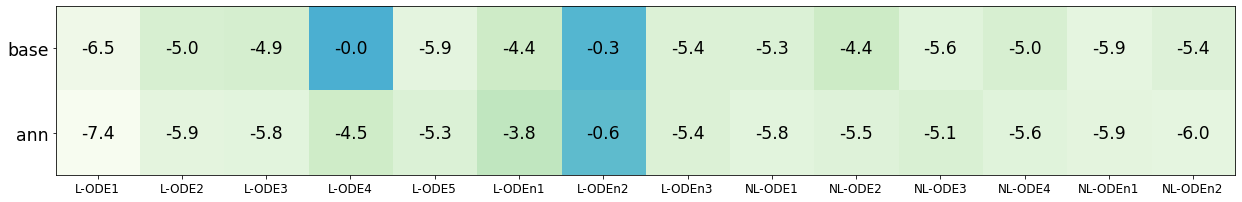

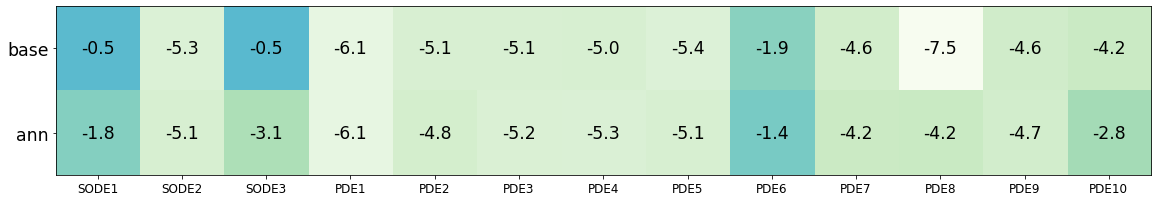

In [81]:
experiments1 = [x["payload"] for x in query("db3") if x["payload"]["kwargs"]["border_loss_multiplier"] == 1]
experiments4 = [x["payload"] for x in query("db8")]
odess = ODES
n = len(odess) // 2 + 1
for odes in [odess[:n], odess[n:]]:
    data = np.log10(np.array([[
            np.mean([x["losses"][-1] for x in experiments1 if x["kwargs"]["ode"] == ode]) for ode in odes
        ], [
            np.mean([x["losses"][-1] for x in experiments4 if x["kwargs"]["ode"] == ode]) for ode in odes
        ]]))
    plt.figure(figsize=(27, 3.1))
    im = plt.imshow(data, vmin=-7, vmax=4, cmap="GnBu")

    plt.xticks(np.arange(len(odes)), odes, fontsize="large")
    plt.yticks(np.arange(2), ["base", "ann"], fontsize="xx-large")

    for i in range(2):
        for j in range(len(odes)):
            plt.text(j, i, f"{data[i, j]:.1f}", ha="center", va="center", color="k", fontsize="xx-large")
    plt.show()

14

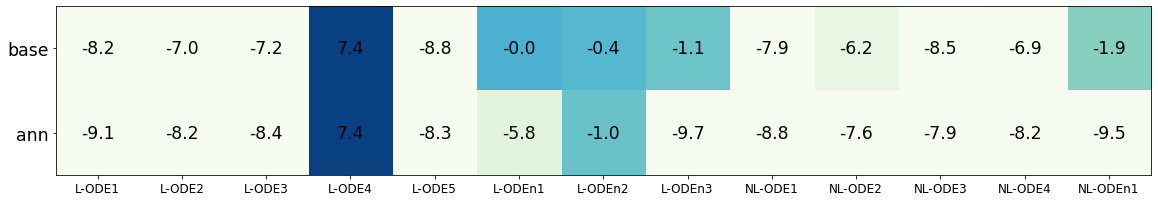

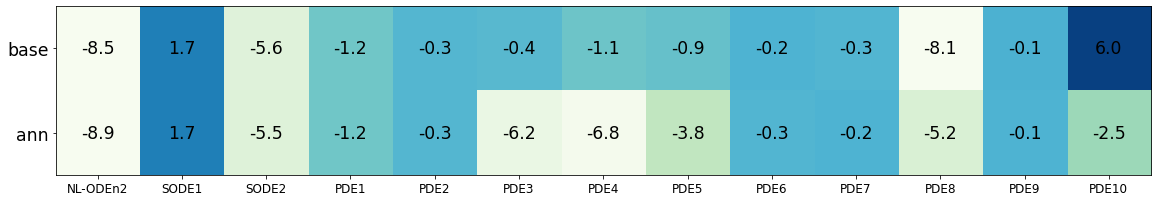

In [82]:
experiments1 = [x["payload"] for x in query("db3") if x["payload"]["kwargs"]["border_loss_multiplier"] == 1]
experiments4 = [x["payload"] for x in query("db8")]
odess = ODES_
n = len(odess) // 2
for odes in [odess[:n], odess[n:]]:
    data = np.log10(np.array([[
            np.mean([x["errors"][-1] for x in experiments1 if x["kwargs"]["ode"] == ode]) for ode in odes
        ], [
            np.mean([x["errors"][-1] for x in experiments4 if x["kwargs"]["ode"] == ode]) for ode in odes
        ]]))
    plt.figure(figsize=(27, 3.1))
    im = plt.imshow(data, vmin=-7, vmax=4, cmap="GnBu")

    plt.xticks(np.arange(len(odes)), odes, fontsize="large")
    plt.yticks(np.arange(2), ["base", "ann"], fontsize="xx-large")

    for i in range(2):
        for j in range(len(odes)):
            plt.text(j, i, f"{data[i, j]:.1f}", ha="center", va="center", color="k", fontsize="xx-large")
    plt.show()

16

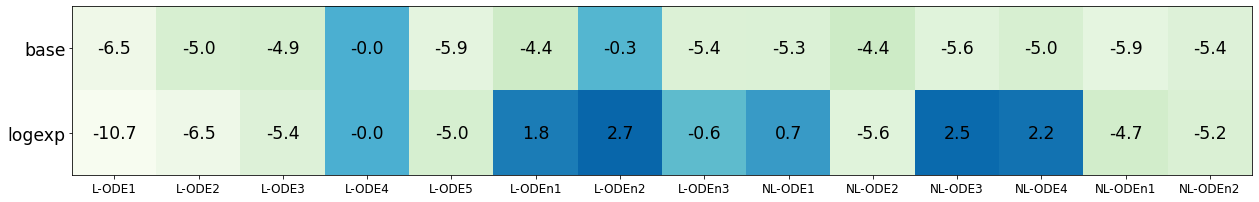

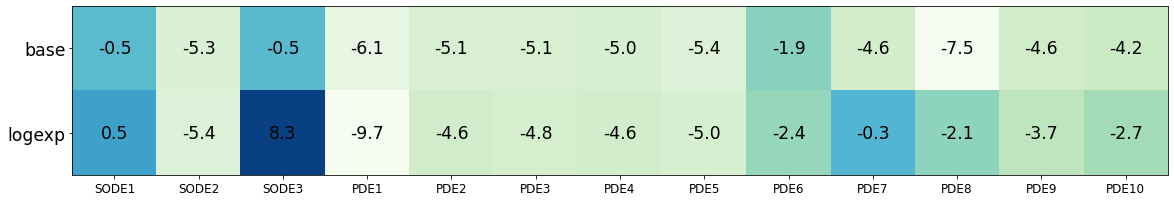

In [55]:
experiments1 = [x["payload"] for x in query("db3") if x["payload"]["kwargs"]["border_loss_multiplier"] == 1]
experiments4 = [x["payload"] for x in query("db9")]
odess = ODES
n = len(odess) // 2+1
for odes in [odess[:n], odess[n:]]:
    data = np.log10(np.array([[
            np.mean([x["losses"][-1] for x in experiments1 if x["kwargs"]["ode"] == ode]) for ode in odes
        ], [
            np.mean([x["losses"][-1] for x in experiments4 if x["kwargs"]["ode"] == ode]) for ode in odes
        ]]))
    plt.figure(figsize=(27, 3.1))
    im = plt.imshow(data, vmin=-7, vmax=4, cmap="GnBu")

    plt.xticks(np.arange(len(odes)), odes, fontsize="large")
    plt.yticks(np.arange(2), ["base", "logexp"], fontsize="xx-large")

    for i in range(2):
        for j in range(len(odes)):
            plt.text(j, i, f"{data[i, j]:.1f}", ha="center", va="center", color="k", fontsize="xx-large")
    plt.show()

17

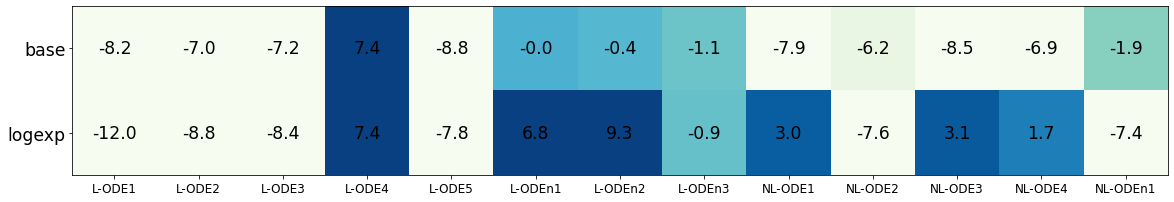

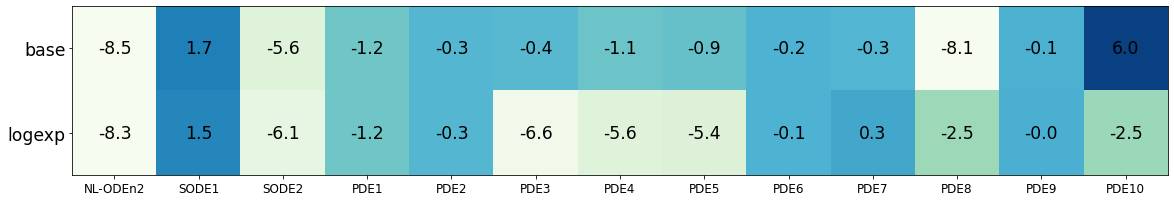

In [53]:
experiments1 = [x["payload"] for x in query("db3") if x["payload"]["kwargs"]["border_loss_multiplier"] == 1]
experiments4 = [x["payload"] for x in query("db9")]
odess = ODES_
n = len(odess) // 2
for odes in [odess[:n], odess[n:]]:
    data = np.log10(np.array([[
            np.mean([x["errors"][-1] for x in experiments1 if x["kwargs"]["ode"] == ode]) for ode in odes
        ], [
            np.mean([x["errors"][-1] for x in experiments4 if x["kwargs"]["ode"] == ode]) for ode in odes
        ]]))
    plt.figure(figsize=(27, 3.1))
    im = plt.imshow(data, vmin=-7, vmax=4, cmap="GnBu")

    plt.xticks(np.arange(len(odes)), odes, fontsize="large")
    plt.yticks(np.arange(2), ["base", "logexp"], fontsize="xx-large")

    for i in range(2):
        for j in range(len(odes)):
            plt.text(j, i, f"{data[i, j]:.1f}", ha="center", va="center", color="k", fontsize="xx-large")
    plt.show()

18

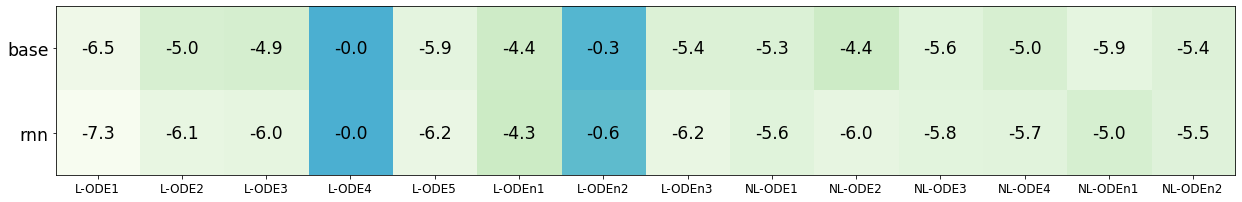

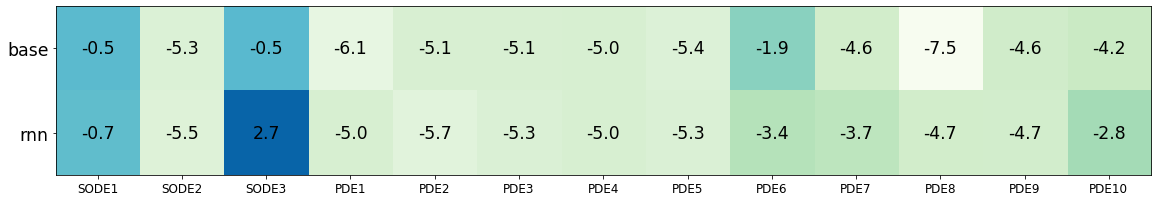

In [51]:
experiments1 = [x["payload"] for x in query("db3") if x["payload"]["kwargs"]["border_loss_multiplier"] == 1]
experiments4 = [x["payload"] for x in query("db")]
odess = ODES
n = len(odess) // 2 + 1
for odes in [odess[:n], odess[n:]]:
    data = np.log10(np.array([[
            np.mean([x["losses"][-1] for x in experiments1 if x["kwargs"]["ode"] == ode]) for ode in odes
        ], [
            np.mean([x["losses"][-1] for x in experiments4 if x["kwargs"]["ode"] == ode]) for ode in odes
        ]]))
    plt.figure(figsize=(27, 3.1))
    im = plt.imshow(data, vmin=-7, vmax=4, cmap="GnBu")

    plt.xticks(np.arange(len(odes)), odes, fontsize="large")
    plt.yticks(np.arange(2), ["base", "rnn"], fontsize="xx-large")

    for i in range(2):
        for j in range(len(odes)):
            plt.text(j, i, f"{data[i, j]:.1f}", ha="center", va="center", color="k", fontsize="xx-large")
    plt.show()

19

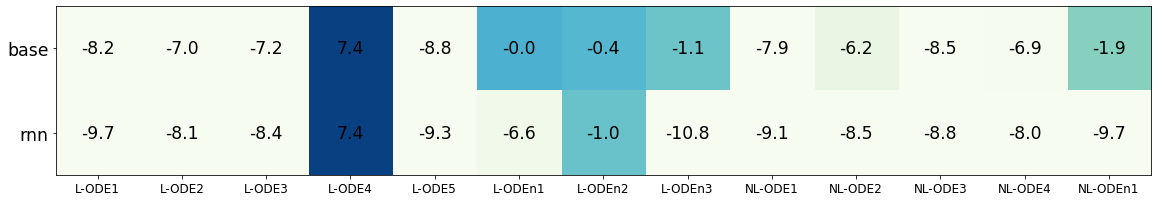

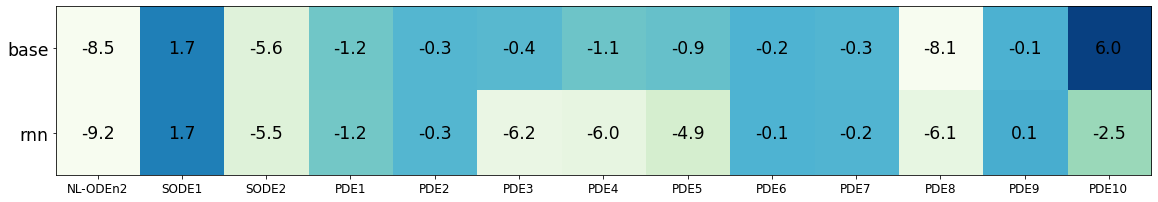

In [48]:
experiments1 = [x["payload"] for x in query("db3") if x["payload"]["kwargs"]["border_loss_multiplier"] == 1]
experiments4 = [x["payload"] for x in query("db")]
odess = ODES_
n = len(odess) // 2
for odes in [odess[:n], odess[n:]]:
    data = np.log10(np.array([[
            np.mean([x["errors"][-1] for x in experiments1 if x["kwargs"]["ode"] == ode]) for ode in odes
        ], [
            np.mean([x["errors"][-1] for x in experiments4 if x["kwargs"]["ode"] == ode]) for ode in odes
        ]]))
    plt.figure(figsize=(27, 3.1))
    im = plt.imshow(data, vmin=-7, vmax=4, cmap="GnBu")

    plt.xticks(np.arange(len(odes)), odes, fontsize="large")
    plt.yticks(np.arange(2), ["base", "rnn"], fontsize="xx-large")

    for i in range(2):
        for j in range(len(odes)):
            plt.text(j, i, f"{data[i, j]:.1f}", ha="center", va="center", color="k", fontsize="xx-large")
    plt.show()